<a href="https://colab.research.google.com/github/igorlauxen/shark-detection/blob/main/shark_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://colab.research.google.com/github/voxel51/fiftyone/blob/v0.9.1/docs/source/tutorials/open_images.ipynb#scrollTo=627MxtHOUjU6

In [2]:
# install fiftyone
!pip install fiftyone
!pip install tensorflow torch torchvision umap-learn
!pip install ipywidgets>=7.5

     |████████████████████████████████| 1.2 MB 38.4 MB/s 
     |████████████████████████████████| 29.2 MB 1.4 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 226 kB 57.9 MB/s 
     |████████████████████████████████| 106 kB 60.7 MB/s 
     |████████████████████████████████| 639 kB 63.0 MB/s 
     |████████████████████████████████| 13.2 MB 35.0 MB/s 
     |████████████████████████████████| 562 kB 52.3 MB/s 
     |████████████████████████████████| 131 kB 58.8 MB/s 
     |████████████████████████████████| 79.9 MB 109 kB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 
     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 77 kB 7.5 MB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |█████████████████████

When loading Open Images from the dataset zoo, there are a [variety of available parameters](https://voxel51.com/docs/fiftyone/api/fiftyone.zoo.datasets.base.html#fiftyone.zoo.datasets.base.OpenImagesV6Dataset) that you can pass to `load_zoo_dataset()` to specify a subset of the images and/or label types to download:

- `label_types` - a list of label types to load. The supported values are (`"detections", "classifications", "segmentations", "relationships"`). By default, all available labels types will be loaded. Specifying `[]` will load only the images
- `classes` - a list of classes of interest. If specified, only samples with at least one object, segmentation, or image-level label in the specified classes will be downloaded
- `attrs` - a list of attributes of interest. If specified, only download samples if they contain at least one attribute in `attrs` or one class in `classes` (only applicable when `label_types` contains `"relationships"`)
- `load_hierarchy` - whether to load the class hierarchy into `dataset.info["hierarchy"]`
- `image_ids` - an array of specific image IDs to download
- `image_ids_file` - a path to a `.txt`, `.csv`, or `.json` file containing image IDs to download

In addition, [like all other zoo datasets](https://voxel51.com/docs/fiftyone/user_guide/dataset_zoo/datasets.html), you can specify:

- `max_samples` - the maximum number of samples to load
- `shuffle` - whether to randomly chose which samples to load if `max_samples` is given
- `seed` - a random seed to use when shuffling

In [4]:
import fiftyone as fo
import fiftyone.zoo as foz

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


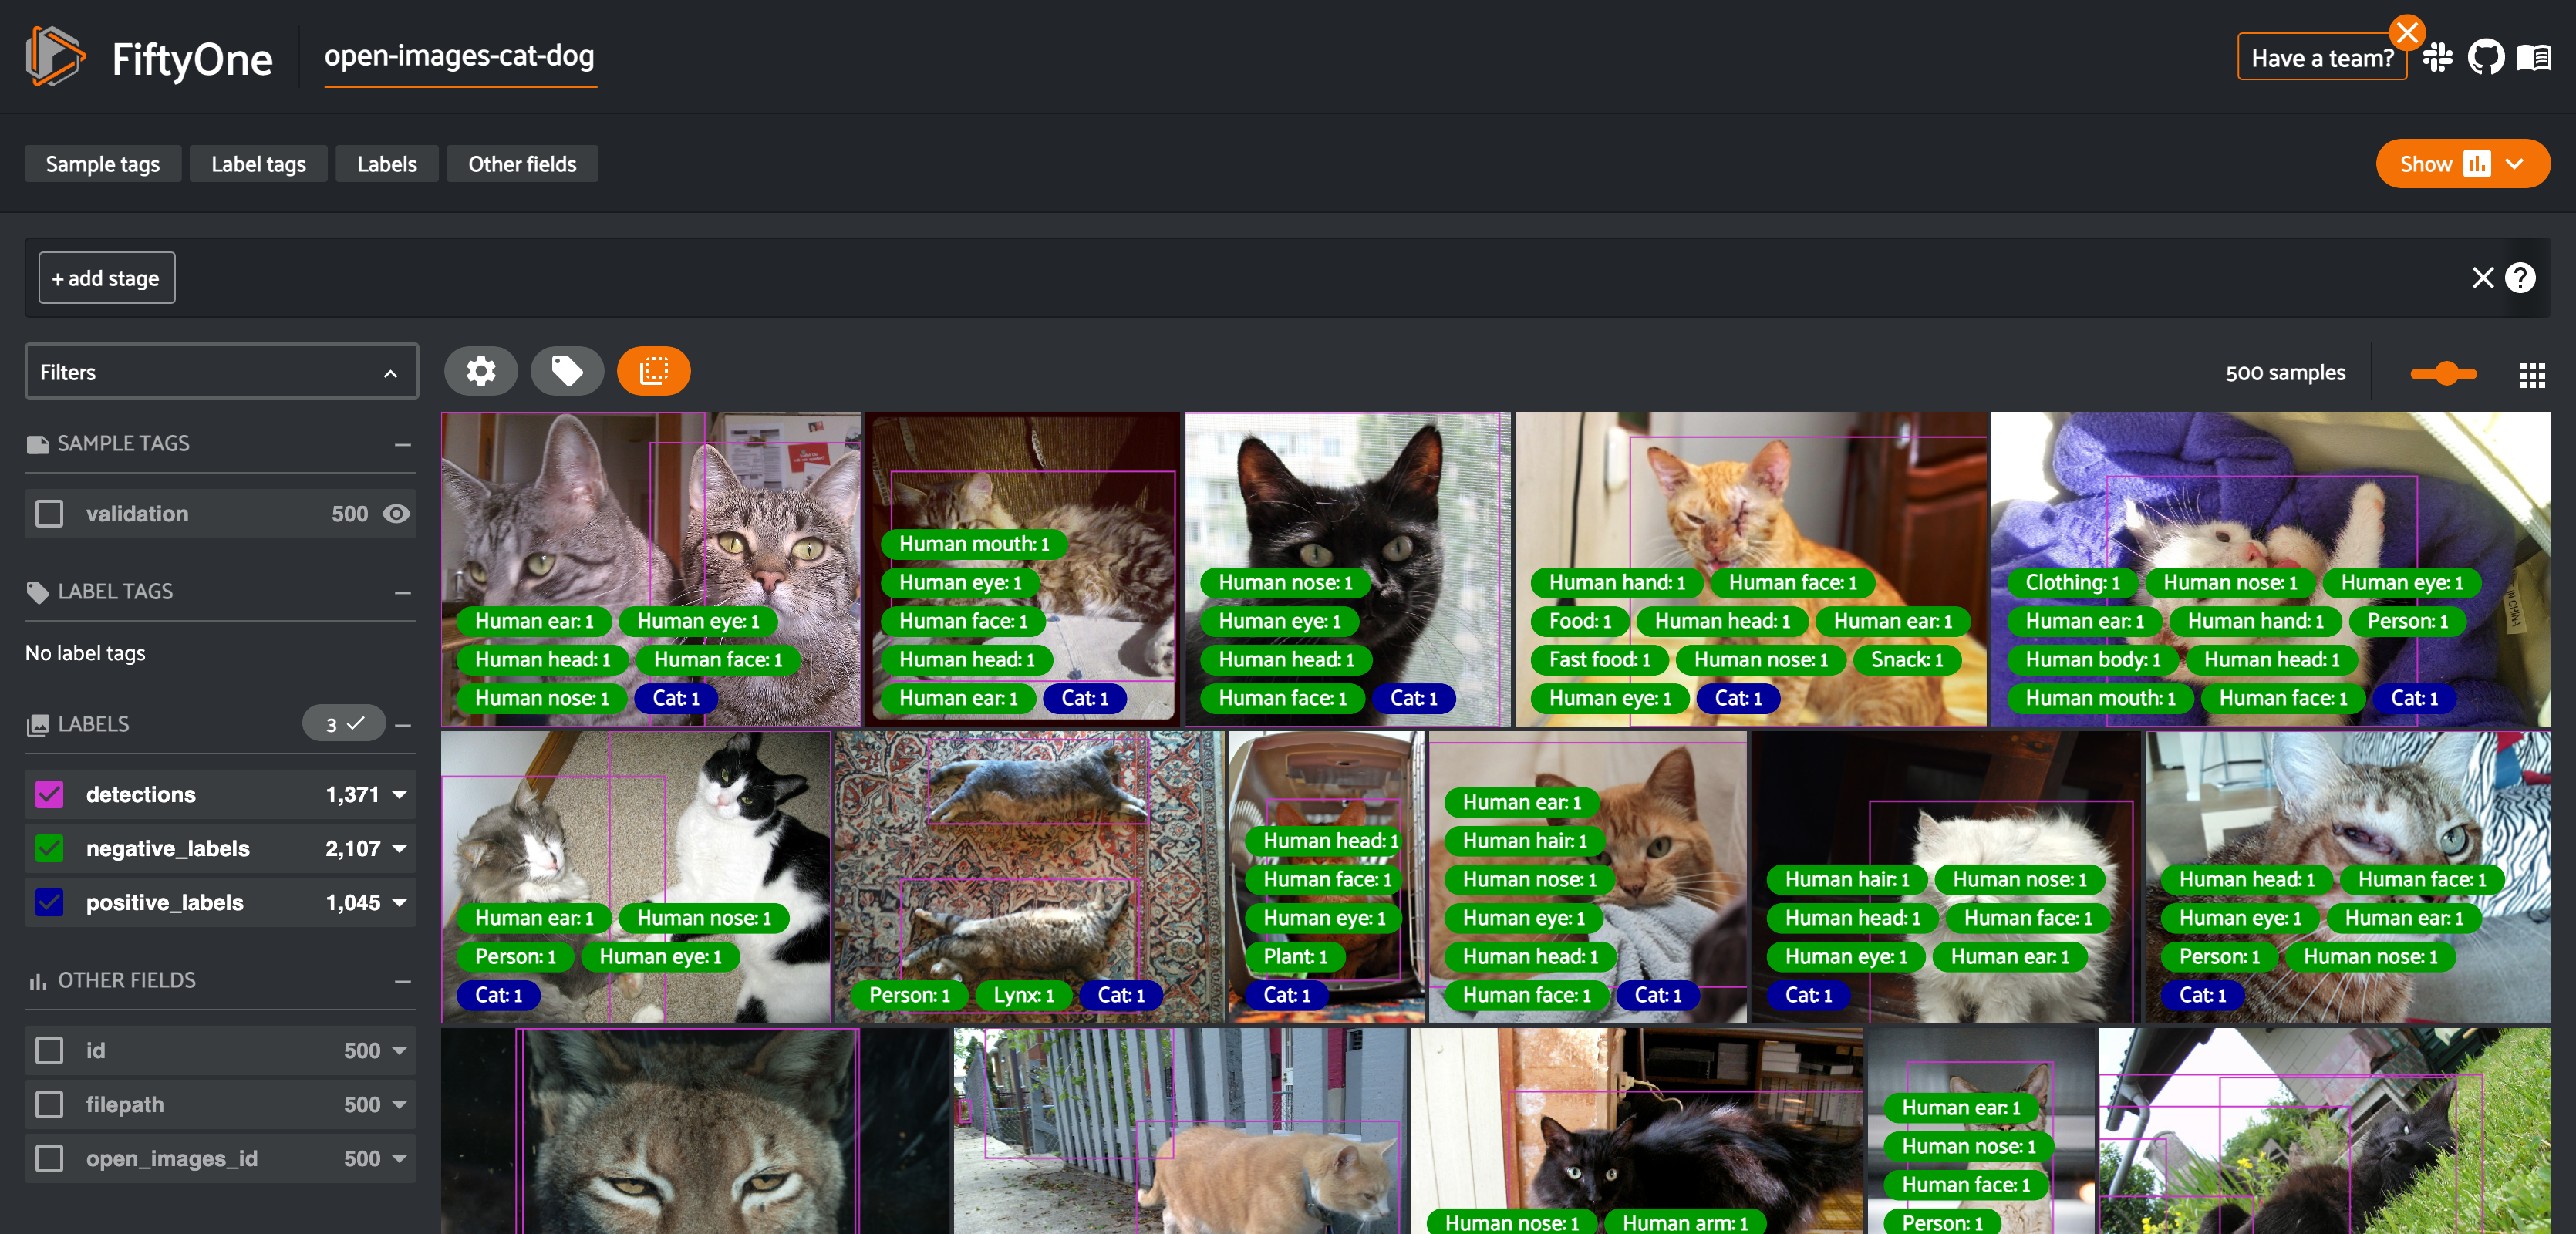

<IPython.core.display.Javascript object>

In [8]:
session = fo.launch_app(dataset)

In [15]:
cat_subset = foz.load_zoo_dataset(
    "open-images-v6", 
    split="validation", 
    label_types=["detections", "classifications"], 
    classes=["Cat"],
    max_samples=250,
    seed=51,
    shuffle=True,
    dataset_name="cat-subset",
)

dog_subset = foz.load_zoo_dataset(
    "open-images-v6", 
    split="validation", 
    label_types=["detections", "classifications"], 
    classes=["Dog"],
    max_samples=250,
    seed=51,
    shuffle=True,
    dataset_name="dog-subset",
)

dataset = foz.load_zoo_dataset(
    "open-images-v6", 
    split="validation", 
    label_types=["detections", "classifications"], 
    classes=["Shark"],
    max_samples=250,
    seed=51,
    shuffle=True,
    dataset_name="shark-subset",
)

Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'cat-subset'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'dog-subset'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Only found 57 (<250) samples matching your requirements
Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'shark-subset'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [16]:
session.dataset = dataset